In [1]:
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import nengo
from nengo.utils.matplotlib import rasterplot
import numpy as np
import tensorflow as tf

import nengo_dl


warnings.simplefilter("ignore")
tf.get_logger().addFilter(lambda rec: "Tracing is expensive" not in rec.msg)

In [5]:
# download MNIST dataset
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()
# flatten images
train_data = train_data.reshape((train_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

n_epochs = 2
n_in = train_data.shape[1]

print(train_data.shape)

(60000, 784)


In [6]:
n_hidden = 64
minibatch_size=50

with nengo.Network() as auto_net:
    # input
    nengo_a = nengo.Node(np.zeros(n_in))

    # first layer
    nengo_b = nengo.Ensemble(n_hidden, 1, neuron_type=nengo.RectifiedLinear())
    nengo.Connection(nengo_a, nengo_b.neurons, transform=nengo_dl.dists.Glorot())

    # second layer
    nengo_c = nengo.Ensemble(n_in, 1, neuron_type=nengo.RectifiedLinear())
    nengo.Connection(
        nengo_b.neurons, nengo_c.neurons, transform=nengo_dl.dists.Glorot()
    )

    # probes are used to collect data from the network
    p_c = nengo.Probe(nengo_c.neurons)
    p_b = nengo.Probe(nengo_b.neurons)

In [4]:
with nengo_dl.Simulator(network=auto_net, minibatch_size=minibatch_size) as sim:
    out = sim.predict(np.ones((minibatch_size, 1, n_in)))
    print(out[p_c].shape,out[p_b].shape)

|                     Building network (0%)                    | ETA:  --:--:--
Build finished in 0:00:00
|#                         Optimizing graph                           | 0:00:00
|#             Optimizing graph: operator simplificaton               | 0:00:00
Optimizing graph: operator simplificaton finished in 0:00:00
|#                Optimizing graph: merging operators                 | 0:00:00
Optimizing graph: merging operators finished in 0:00:00
|#                Optimizing graph: ordering signals                  | 0:00:00
Optimizing graph: ordering signals finished in 0:00:00
|#                Optimizing graph: creating signals                  | 0:00:00
Optimizing graph: creating signals finished in 0:00:00
Optimization finished in 0:00:00
|#                        Constructing graph                          | 0:00:00
|               #         Constructing graph                          | 0:00:01
|           Constructing graph: pre-build stage (0%)           | ETA:  --:

2022-03-07 12:21:50.564788: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-03-07 12:21:50.564846: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support
2022-03-07 12:21:50.566923: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-03-07 12:21:50.566951: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: 2 root error(s) found.
  (0) INTERNAL:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul
 (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py:348)
]]
	 [[keras_model/TensorGraph/while/exit/_101/_8]]
  (1) INTERNAL:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul
 (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py:348)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_774]

Errors may have originated from an input operation.
Input Source operations connected to node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul:
In[0] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/Reshape (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/signals.py:420)	
In[1] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/transpose:

Operation defined at: (most recent call last)
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
>>>     await result
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_3734866/1819349996.py", line 2, in <module>
>>>     out = sim.predict(np.ones((minibatch_size, 1, n_in)))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 67, in require_open
>>>     return wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 678, in predict
>>>     return self._call_keras(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 50, in with_self
>>>     output = wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 1043, in _call_keras
>>>     outputs = getattr(self.keras_model, func_type)(**func_args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1789, in predict
>>>     tmp_batch_outputs = self.predict_function(iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step
>>>     outputs = model.predict_step(data)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
>>>     return self(x, training=False)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 488, in call
>>>     self._build_loop(sub) if self.use_loop else self._build_no_loop(sub)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 638, in _build_loop
>>>     loop_vars = tf.while_loop(
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 615, in loop_body
>>>     loop_i = self._build_inner_loop(loop_i, update_probes, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 770, in _build_inner_loop
>>>     side_effects = self.op_builder.build_step(self.signals, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/builder.py", line 101, in build_step
>>>     output = self.op_builds[ops].build_step(signals)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py", line 348, in build_step
>>>     dot = tf.matmul(A, tf.transpose(X, perm=self.perm))
>>> 

Input Source operations connected to node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul:
In[0] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/Reshape (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/signals.py:420)	
In[1] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/transpose:

Operation defined at: (most recent call last)
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
>>>     await result
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_3734866/1819349996.py", line 2, in <module>
>>>     out = sim.predict(np.ones((minibatch_size, 1, n_in)))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 67, in require_open
>>>     return wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 678, in predict
>>>     return self._call_keras(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 50, in with_self
>>>     output = wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 1043, in _call_keras
>>>     outputs = getattr(self.keras_model, func_type)(**func_args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1789, in predict
>>>     tmp_batch_outputs = self.predict_function(iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step
>>>     outputs = model.predict_step(data)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
>>>     return self(x, training=False)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 488, in call
>>>     self._build_loop(sub) if self.use_loop else self._build_no_loop(sub)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 638, in _build_loop
>>>     loop_vars = tf.while_loop(
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 615, in loop_body
>>>     loop_i = self._build_inner_loop(loop_i, update_probes, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 770, in _build_inner_loop
>>>     side_effects = self.op_builder.build_step(self.signals, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/builder.py", line 101, in build_step
>>>     output = self.op_builds[ops].build_step(signals)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py", line 348, in build_step
>>>     dot = tf.matmul(A, tf.transpose(X, perm=self.perm))
>>> 

Function call stack:
predict_function -> keras_model_TensorGraph_while_body_498 -> predict_function -> keras_model_TensorGraph_while_body_498


In [7]:
# set initial neuron gains to 1 and biases to 0
for ens in auto_net.all_ensembles:
    ens.gain = nengo.dists.Choice([1])
    ens.bias = nengo.dists.Choice([0])

# disable synaptic filtering on all connections
for conn in auto_net.all_connections:
    conn.synapse = None

train_data = train_data[:, None, :]
test_data = test_data[:, None, :]

In [8]:
with nengo_dl.Simulator(auto_net, minibatch_size=minibatch_size) as sim:
    sim.compile(optimizer=tf.optimizers.RMSprop(1e-3), loss=tf.losses.mse)

    # run training loop
    sim.fit(train_data, train_data, epochs=n_epochs)

    # evaluate performance on test set
    sim.evaluate(test_data, test_data)

    # Save the model
    sim.save_params("./LIF_mnist")


|                     Building network (0%)                    | ETA:  --:--:--
Build finished in 0:00:00
|#                         Optimizing graph                           | 0:00:00
|#             Optimizing graph: operator simplificaton               | 0:00:00
Optimizing graph: operator simplificaton finished in 0:00:00
|#                Optimizing graph: merging operators                 | 0:00:00
Optimizing graph: merging operators finished in 0:00:00
|#                Optimizing graph: ordering signals                  | 0:00:00
Optimizing graph: ordering signals finished in 0:00:00
|#                Optimizing graph: creating signals                  | 0:00:00
Optimizing graph: creating signals finished in 0:00:00
Optimization finished in 0:00:00
|#                        Constructing graph                          | 0:00:00
|                      #  Constructing graph                          | 0:00:02
|           Constructing graph: pre-build stage (0%)           | ETA:  --:

2022-03-07 17:15:55.826671: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-03-07 17:15:55.826727: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: 2 root error(s) found.
  (0) INTERNAL:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul
 (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py:348)
]]
	 [[keras_model/TensorGraph/while/exit/_104/_10]]
  (1) INTERNAL:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul
 (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py:348)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2119]

Errors may have originated from an input operation.
Input Source operations connected to node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul:
In[0] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/Reshape (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/signals.py:420)	
In[1] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/transpose:

Operation defined at: (most recent call last)
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
>>>     await result
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_3756207/1883735668.py", line 5, in <module>
>>>     sim.fit(train_data, train_data, epochs=n_epochs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 67, in require_open
>>>     return wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 867, in fit
>>>     return self._call_keras(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 50, in with_self
>>>     output = wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 1043, in _call_keras
>>>     outputs = getattr(self.keras_model, func_type)(**func_args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 488, in call
>>>     self._build_loop(sub) if self.use_loop else self._build_no_loop(sub)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 638, in _build_loop
>>>     loop_vars = tf.while_loop(
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 615, in loop_body
>>>     loop_i = self._build_inner_loop(loop_i, update_probes, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 770, in _build_inner_loop
>>>     side_effects = self.op_builder.build_step(self.signals, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/builder.py", line 101, in build_step
>>>     output = self.op_builds[ops].build_step(signals)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py", line 348, in build_step
>>>     dot = tf.matmul(A, tf.transpose(X, perm=self.perm))
>>> 

Input Source operations connected to node keras_model/TensorGraph/while/iteration_0/DotIncBuilder/MatMul:
In[0] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/Reshape (defined at /home/karthik/sim_clean/nengo-dl/nengo_dl/signals.py:420)	
In[1] keras_model/TensorGraph/while/iteration_0/DotIncBuilder/transpose:

Operation defined at: (most recent call last)
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
>>>     await result
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_3756207/1883735668.py", line 5, in <module>
>>>     sim.fit(train_data, train_data, epochs=n_epochs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 67, in require_open
>>>     return wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 867, in fit
>>>     return self._call_keras(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/nengo/utils/magic.py", line 179, in __call__
>>>     return self.wrapper(self.__wrapped__, self.instance, args, kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 50, in with_self
>>>     output = wrapped(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/simulator.py", line 1043, in _call_keras
>>>     outputs = getattr(self.keras_model, func_type)(**func_args)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/home/karthik/miniconda3/envs/neuromorphic/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 488, in call
>>>     self._build_loop(sub) if self.use_loop else self._build_no_loop(sub)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 638, in _build_loop
>>>     loop_vars = tf.while_loop(
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 615, in loop_body
>>>     loop_i = self._build_inner_loop(loop_i, update_probes, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/tensor_graph.py", line 770, in _build_inner_loop
>>>     side_effects = self.op_builder.build_step(self.signals, progress)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/builder.py", line 101, in build_step
>>>     output = self.op_builds[ops].build_step(signals)
>>> 
>>>   File "/home/karthik/sim_clean/nengo-dl/nengo_dl/op_builders.py", line 348, in build_step
>>>     dot = tf.matmul(A, tf.transpose(X, perm=self.perm))
>>> 

Function call stack:
train_function -> keras_model_TensorGraph_while_body_1309_rewritten -> train_function -> keras_model_TensorGraph_while_body_1309_rewritten


|                     Building network (0%)                    | ETA:  --:--:--
Build finished in 0:00:00
|#                         Optimizing graph                           | 0:00:00
|#             Optimizing graph: operator simplificaton               | 0:00:00
Optimizing graph: operator simplificaton finished in 0:00:00
|#                Optimizing graph: merging operators                 | 0:00:00
Optimizing graph: merging operators finished in 0:00:00
|#                Optimizing graph: ordering signals                  | 0:00:00
Optimizing graph: ordering signals finished in 0:00:00
|#                Optimizing graph: creating signals                  | 0:00:00
Optimizing graph: creating signals finished in 0:00:00
Optimization finished in 0:00:00
|#                        Constructing graph                          | 0:00:00
|           Constructing graph: pre-build stage (0%)           | ETA:  --:--:--
Constructing graph: pre-build stage finished in 0:00:00
|             Cons

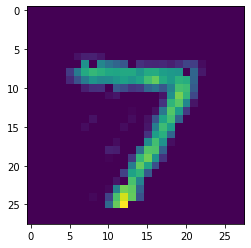

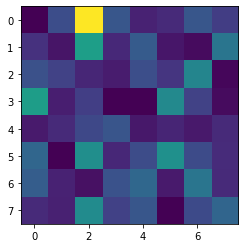

Mean of the hidden space rep: 0.09468463


In [24]:
with nengo_dl.Simulator(auto_net, minibatch_size=minibatch_size) as sim:
    #sim.compile(optimizer=tf.optimizers.RMSprop(1e-3), loss=tf.losses.mse)

    # run training loop
    #sim.fit(train_data, train_data, epochs=n_epochs)

    # evaluate performance on test set
    #sim.evaluate(test_data, test_data)

    # Load the saved model
    sim.load_params("./LIF_mnist")

    # display example output
    output = sim.predict(test_data[:minibatch_size])
    plt.figure()
    plt.imshow(output[p_c][0].reshape((28, 28)))
    plt.show()

    # display the latent space representation
    output = sim.predict(test_data[:minibatch_size])
    plt.figure()
    plt.imshow(output[p_b][0].reshape((8, 8)))
    plt.show()

    hidden_rep = output[p_b][0]
    norm = np.linalg.norm(hidden_rep)
    hidden_rep = hidden_rep/norm
    print('Mean of the hidden space rep:', hidden_rep.mean())
